# Combining top-down and bottom-up approaches to evaluate recent trends and seasonal patters in U.K. N2O emissions
## 3.2 Seasonal cycles 
----
Jupyter Notebook demonstrating the seasonal analysis performed on the posterior and a priori N2O emissions for the UK. Land emissions only

----
**Created:** 24 August 2023

**Authors:** Eric Saboya$^{1}$, Alistair J. Manning$^{2}$, Peter Levy$^{3}$, et al. 

**Affiliations:**

$^{1}$: School of Geographical Sciences, University of Bristol, UK

$^{2}$: Met Office Hadley Centre, Exeter, UK

$^{3}$: UK Centre for Ecology and Hydrology, Edinburgh, UK

**Contact:** eric.saboya[at]bristol.ac.uk

---  

In [1]:
import os 
import pickle
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import scipy
import scipy.stats as stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.dates as mdates
import matplotlib.text as text

from matplotlib import ticker
from matplotlib import gridspec
from matplotlib import rcParams
from matplotlib.lines import Line2D

def update_rcParams(key, val):
    if key in rcParams:
        rcParams[key] = val

update_rcParams('font.size', 12)
update_rcParams('font.family', 'serif')
update_rcParams('xtick.major.size', 8)
update_rcParams('xtick.labelsize', 'large')
update_rcParams('xtick.direction', "in")
update_rcParams('xtick.minor.visible', False) #
update_rcParams('xtick.top', True) #
update_rcParams('ytick.major.size', 8)
update_rcParams('ytick.labelsize', 'large')
update_rcParams('ytick.direction', "in")
update_rcParams('ytick.minor.visible', True) #
update_rcParams('ytick.right', True) # 
update_rcParams('xtick.minor.size', 4)
update_rcParams('ytick.minor.size', 4)
update_rcParams('xtick.major.pad', 10)
update_rcParams('ytick.major.pad', 10)
update_rcParams('legend.numpoints', 1)
#update_rcParams('use.tex',True)

mpl.rcParams['axes.linewidth'] = 2.2

## Specify the colour palette 

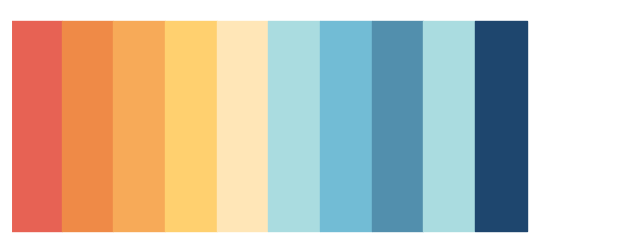

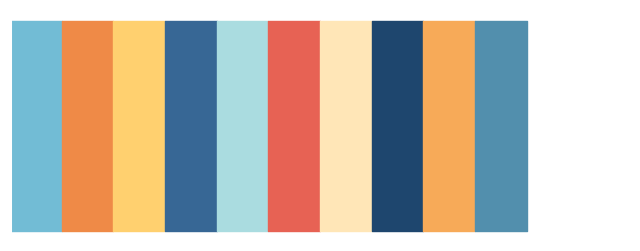

In [2]:

color_palette = {'6': "#e76254",
                 '2': "#ef8a47",
                 '9': "#f7aa58",
                 '3': "#ffd06f",
                 '7': "#ffe6b7",
                 '5': "#aadce0",
                 '1': "#72bcd5",
                 '10': "#528fad",
                 '4': "#376795",
                 '8': "#1e466e"}


fig, ax = plt.subplots(figsize=(8,3))
ax.fill_between(np.linspace(0,1), 0, 1, color=color_palette['6'])
ax.fill_between(np.linspace(1,2), 0, 1, color=color_palette['2'])
ax.fill_between(np.linspace(2,3), 0, 1, color=color_palette['9'])
ax.fill_between(np.linspace(3,4), 0, 1, color=color_palette['3'])
ax.fill_between(np.linspace(4,5), 0, 1, color=color_palette['7'])
ax.fill_between(np.linspace(5,6), 0, 1, color=color_palette['5'])
ax.fill_between(np.linspace(6,7), 0, 1, color=color_palette['1'])
ax.fill_between(np.linspace(7,8), 0, 1, color=color_palette['10'])
ax.fill_between(np.linspace(8,9), 0, 1, color=color_palette['5'])
ax.fill_between(np.linspace(9,10), 0, 1, color=color_palette['8'])

ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim((0,12))

plt.show()

fig, ax = plt.subplots(figsize=(8,3))
ax.fill_between(np.linspace(0,1), 0, 1, color=color_palette['1'])
ax.fill_between(np.linspace(1,2), 0, 1, color=color_palette['2'])
ax.fill_between(np.linspace(2,3), 0, 1, color=color_palette['3'])
ax.fill_between(np.linspace(3,4), 0, 1, color=color_palette['4'])
ax.fill_between(np.linspace(4,5), 0, 1, color=color_palette['5'])
ax.fill_between(np.linspace(5,6), 0, 1, color=color_palette['6'])
ax.fill_between(np.linspace(6,7), 0, 1, color=color_palette['7'])
ax.fill_between(np.linspace(7,8), 0, 1, color=color_palette['8'])
ax.fill_between(np.linspace(8,9), 0, 1, color=color_palette['9'])
ax.fill_between(np.linspace(9,10), 0, 1, color=color_palette['10'])

ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim((0,12))

plt.show()

## Read data files
Reading data files containing posterior and a priori UK emissions values 

In [3]:
# ---------------------------------------------------------
# Bristol-MCMC files using monthly a priori fluxes 
# ---------------------------------------------------------
# 1. "bmcmc_local_193" : 193 basis functions, local filter applied
# 2. "bmcmc_local_292" : 292 basis functions, local filter applied
# 3. "bmcmc_intem_193" : 193 basis functions, InTEM filter applied
# 4. "bmcmc_intem_292" : 292 basis functions, InTEM filter applied
# 5. "bmcmc_nofil_193" : 193 basis functions, no filter applied
# 6. "bmcmc_nofil_292" : 292 basis functions, no filter applied

rhime_mnthly = xr.open_dataset(os.path.join("/user/work/wz22079/projects/N2O/data/RHIME_UK_N2O_2013-2022.nc"))

bmcmc_local_193 = xr.open_dataset('/user/work/wz22079/projects/N2O/data/bmcmc-basis193-localfilter-20132022.nc')
bmcmc_local_262 = xr.open_dataset('/user/work/wz22079/projects/N2O/data/bmcmc-basis262-localfilter-20132022.nc')
# bmcmc_intem_193 = xr.open_dataset('/user/work/wz22079/projects/N2O/bmcmc-basis193-intemfilter-20132022.nc')
# bmcmc_intem_262 = xr.open_dataset('/user/work/wz22079/projects/N2O/bmcmc-basis262-intemfilter-20132022.nc')
bmcmc_nofil_193 = xr.open_dataset('/user/work/wz22079/projects/N2O/data/bmcmc-basis193-nofilter-20132022.nc')
# bmcmc_nofil_262 = xr.open_dataset('/user/work/wz22079/projects/N2O/bmcmc-basis262-nofilter-20132022.nc')

# ---------------------------------------------------------
# InTEM files using monthly a priori fluxes 
# ---------------------------------------------------------
intem_mnthly = xr.open_dataset(os.path.join("/user/work/wz22079/projects/N2O/data/intem-basis100-20122022.nc"))

In [4]:
# ---------------------------------------------------------
# NAEI annual totals + projected emissions
# ---------------------------------------------------------
t_projections, n2o_ref, n2o_lowgdp, n2o_highgdp = np.genfromtxt('/user/work/wz22079/projects/N2O/data/n2o_naei_projections.csv',
                                                                unpack=True, delimiter=',',
                                                                skip_header=1, usecols=(0,1,2,3))

with open('/user/work/wz22079/projects/N2O/data/ukghg_monthly_profile.pickle','rb') as handle:
    ukghg_monthly_profile = pickle.load(handle)

## Seasonal analysis
We begin by calculating the annual posterior emissions totals from which we then calculate a linear trend from the inversion period

In [7]:
# calculate no. of seconds per month 
seconds_in_month = []

for year in [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]:
    seconds_in_month.append((dt.datetime(year,2,1,0,0) - dt.datetime(year,1,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,3,1,0,0) - dt.datetime(year,2,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,4,1,0,0) - dt.datetime(year,3,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,5,1,0,0) - dt.datetime(year,4,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,6,1,0,0) - dt.datetime(year,5,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,7,1,0,0) - dt.datetime(year,6,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,8,1,0,0) - dt.datetime(year,7,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,9,1,0,0) - dt.datetime(year,8,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,10,1,0,0) - dt.datetime(year,9,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,11,1,0,0) - dt.datetime(year,10,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,12,1,0,0) - dt.datetime(year,11,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year+1,1,1,0,0) - dt.datetime(year,12,1,0,0)).total_seconds())

**Seasonal analysis using all data**

In [15]:
# Convert monthly values from Gg/yr to Gg/month 
intem_post_mu_land = intem_mnthly['uk-posterior-mu-land'].values[12::] * np.array(seconds_in_month) / (3600*24*365.25)
intem_post_68_land = intem_mnthly['uk-posterior-68-land'].values[12::] #* np.array(seconds_in_month) / (3600*24*365.25)

# local, 193
rhime_post_mu_land = rhime_mnthly['uk-posterior-mean-land'].values * np.array(seconds_in_month) / (3600*24*365.25)
rhime_post_68_low_land = rhime_mnthly['uk-posterior-68-land'].values[:,0] #* np.array(seconds_in_month) / (3600*24*365.25)
rhime_post_68_upp_land = rhime_mnthly['uk-posterior-68-land'].values[:,1] #* np.array(seconds_in_month) / (3600*24*365.25)

# local, 262
# bmcmc_post_mu_land = bmcmc_local_262['uk-posterior-mu-land'].values * np.array(seconds_in_month) / (3600*24*365.25)
# bmcmc_post_68_low_land = bmcmc_local_262['uk-posterior-68lower-land'].values #* np.array(seconds_in_month) / (3600*24*365.25)
# bmcmc_post_68_upp_land = bmcmc_local_262['uk-posterior-68upper-land'].values #* np.array(seconds_in_month) / (3600*24*365.25)


# Calculate annual posterior values 
intem_post_mu_land_yr = []
intem_post_68_land_yr = []

# bmcmc_post_mu_land_yr = []
# bmcmc_post_68_low_land_yr = []
# bmcmc_post_68_upp_land_yr = []

rhime_post_mu_land_yr = []
rhime_post_68_low_land_yr = []
rhime_post_68_upp_land_yr = []


for i in range(0, len(rhime_post_mu_land), 12):
    rhime_post_mu_land_yr.append(sum(rhime_post_mu_land[i:i+12])/1e9)
    rhime_post_68_low_land_yr.append(np.median(rhime_post_68_low_land[i:i+12])/1e9)
    rhime_post_68_upp_land_yr.append(np.median(rhime_post_68_upp_land[i:i+12])/1e9)

    # bmcmc_post_mu_land_yr.append(sum(bmcmc_post_mu_land[i:i+12])/1e9)
    # bmcmc_post_68_low_land_yr.append(np.median(bmcmc_post_68_low_land[i:i+12])/1e9)
    # bmcmc_post_68_upp_land_yr.append(np.median(bmcmc_post_68_upp_land[i:i+12])/1e9)
    
    intem_post_mu_land_yr.append(sum(intem_post_mu_land[i:i+12]))
    intem_post_68_land_yr.append(np.median(intem_post_68_land[i:i+12]))

In [17]:
# fig, ax = plt.subplots(figsize=(10,5))

# # Bristol-MCMC yearly posterior emissions 
# ax.plot(np.arange(2013, 2023, 1), np.array(bmcmc_post_mu_land_yr), '-', color=color_palette['1'], lw=1.5, label='Bristol-MCMC')
# ax.fill_between(np.arange(2013, 2023, 1), np.array(bmcmc_post_mu_land_yr)-np.array(bmcmc_post_68_low_land_yr), np.array(bmcmc_post_mu_land_yr)+np.array(bmcmc_post_68_upp_land_yr), color=color_palette['2'], alpha=0.5)


# ax.plot(np.arange(2013, 2023, 1), np.array(bmcmc_post_mu_land_yr_193), '-', color=color_palette['4'], lw=1.5, label='Bristol-MCMC')
# ax.fill_between(np.arange(2013, 2023, 1), np.array(bmcmc_post_mu_land_yr_193)-np.array(bmcmc_post_68_low_land_yr_193), np.array(bmcmc_post_mu_land_yr_193)+np.array(bmcmc_post_68_upp_land_yr_193), color=color_palette['4'], alpha=0.5)



# # InTEM yearly posterior emissions 
# ax.plot(np.arange(2013, 2023, 1), np.array(intem_post_mu_land_yr), '-', color=color_palette['9'], lw=1.5, label='InTEM')

# ax.fill_between(np.arange(2013, 2023, 1), (np.array(intem_post_mu_land_yr)-np.array(intem_post_68_land_yr)), 
#                 (np.array(intem_post_mu_land_yr)+np.array(intem_post_68_land_yr)),
#                 color=color_palette['9'], alpha=0.5)

# ax.plot(t_projections[0:-9], n2o_ref[0:-9] * 1e12/ 1e9 / 265, 'k-', label='NAEI', lw=1.5)
# ax.plot(t_projections[-10::], n2o_ref[-10::] * 1e12/ 1e9 / 265, 'k--', label='NAEI projections', lw=1.5)

# # ax.plot(np.arange(2013, 2023, 1), prior_co2eq, 'k-', label='NAEI')
# ax.set_xlim((2013,2030))
# ax.set_ylim((40, 150))
# ax.legend(fancybox=False, frameon=False,prop={'weight':'bold', 'size':'small'}, markerscale=1.5)
# ax.set_ylabel(r'N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)')
# ax.set_xlabel('Year')
# plt.show()

In [18]:
import statsmodels.api as sm 
import scipy.stats as stats

x = np.arange(0, 10, 1)
x_trend = sm.add_constant(x)

# RHIME: local, 262
# fit = sm.OLS(np.array(bmcmc_post_mu_land_yr), x_trend).fit()
# bmcmc262_fit_wls = sm.WLS(np.array(bmcmc_post_mu_land_yr), x_trend, weights=np.array(bmcmc_post_mu_land_yr)-np.array(bmcmc_post_68_low_land_yr)).fit()
# print(bmcmc262_fit_wls.summary())

# RHIME local, 193
fit = sm.OLS(np.array(rhime_post_mu_land_yr), x_trend).fit()
rhime_fit_wls = sm.WLS(np.array(rhime_post_mu_land_yr), x_trend, weights=np.array(rhime_post_mu_land_yr)-np.array(rhime_post_68_low_land_yr)).fit()
# print(bmcmc193_fit_wls.summary())

# InTEM 
fit_intem = sm.OLS(np.array(intem_post_mu_land_yr), x_trend).fit()
intem_fit_wls = sm.WLS(np.array(intem_post_mu_land_yr), x_trend, weights=np.array(intem_post_mu_land_yr)-np.array(intem_post_68_land_yr)).fit()

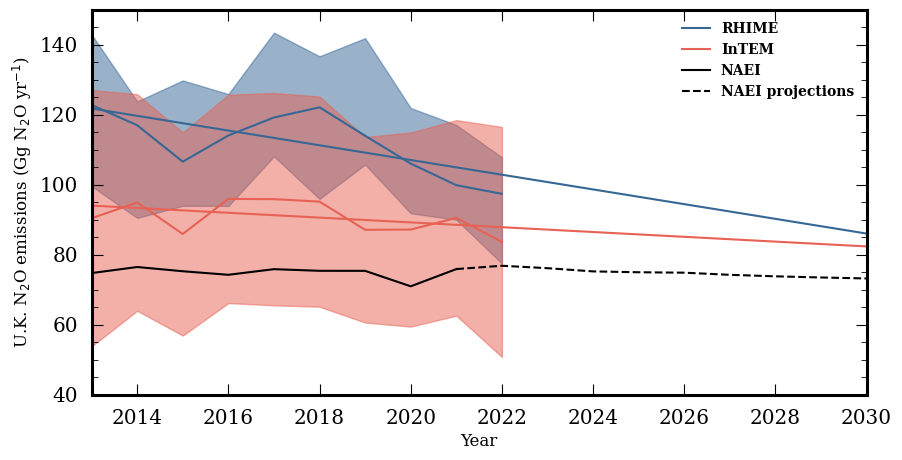

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

# RHIME yearly posterior emissions 
ax.plot(np.arange(2013, 2023, 1), np.array(rhime_post_mu_land_yr), '-', color=color_palette['4'], lw=1.5, label='RHIME')
ax.fill_between(np.arange(2013, 2023, 1), np.array(rhime_post_68_low_land_yr), np.array(rhime_post_68_upp_land_yr), color=color_palette['4'], alpha=0.5)
ax.plot(np.arange(2013, 2031, 1), (np.arange(0, 18, 1)*rhime_fit_wls.params[1])+rhime_fit_wls.params[0], '-', color=color_palette['4'])


# ax.plot(np.arange(2013, 2023, 1), np.array(bmcmc_post_mu_land_yr_193), '-', color=color_palette['main3'], lw=1.5, label='Bristol-MCMC')
# ax.fill_between(np.arange(2013, 2023, 1), np.array(bmcmc_post_mu_land_yr_193)-np.array(bmcmc_post_68_low_land_yr_193), np.array(bmcmc_post_mu_land_yr_193)+np.array(bmcmc_post_68_upp_land_yr_193), color=color_palette['main3'], alpha=0.5)
# ax.plot(np.arange(2013, 2031, 1), (np.arange(0, 18, 1)*bmcmc193_fit_wls.params[1])+bmcmc193_fit_wls.params[0], '-', color=color_palette['main3'])


# InTEM yearly posterior emissions 
ax.plot(np.arange(2013, 2023, 1), np.array(intem_post_mu_land_yr), '-', color=color_palette['6'], lw=1.5, label='InTEM')
ax.fill_between(np.arange(2013, 2023, 1), (np.array(intem_post_mu_land_yr)-np.array(intem_post_68_land_yr)), 
                (np.array(intem_post_mu_land_yr)+np.array(intem_post_68_land_yr)),
                color=color_palette['6'], alpha=0.5)

ax.plot(np.arange(2013, 2031, 1), (np.arange(0, 18, 1)*intem_fit_wls.params[1])+intem_fit_wls.params[0], '-', color=color_palette['6'])

# NAEI emissions
ax.plot(t_projections[0:-9], n2o_ref[0:-9] * 1e12/ 1e9 / 265, 'k-', label='NAEI', lw=1.5)
ax.plot(t_projections[-10::], n2o_ref[-10::] * 1e12/ 1e9 / 265, 'k--', label='NAEI projections', lw=1.5)

# ax.plot(np.arange(2013, 2023, 1), prior_co2eq, 'k-', label='NAEI')
ax.set_xlim((2013,2030))
ax.set_ylim((40, 150))
ax.legend(fancybox=False, frameon=False,prop={'weight':'bold', 'size':'small'}, markerscale=1.5)
ax.set_ylabel(r'U.K. N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)')
ax.set_xlabel('Year')
plt.show()

In [21]:
# print("Bristol-MCMC (local, 262) trend: ", bmcmc262_fit_wls.params[1]/10, "Gg N2O/yr")
print("RHIME (local, 193) trend: ", rhime_fit_wls.params[1]/10, "Gg N2O/yr")
print("InTEM trend: ", intem_fit_wls.params[1]/10, "Gg N2O/yr")

RHIME (local, 193) trend:  -0.21023521322662847 Gg N2O/yr
InTEM trend:  -0.06864469984613528 Gg N2O/yr


In [22]:
# Trends
rhime_trend = (np.arange(0, 10, 1/12)*rhime_fit_wls.params[1])+rhime_fit_wls.params[0]
# bmcmc_262_trend = (np.arange(0, 10, 1/12)*bmcmc262_fit_wls.params[1])+bmcmc262_fit_wls.params[0]
intem_trend = (np.arange(0, 10, 1/12)*intem_fit_wls.params[1])+intem_fit_wls.params[0]

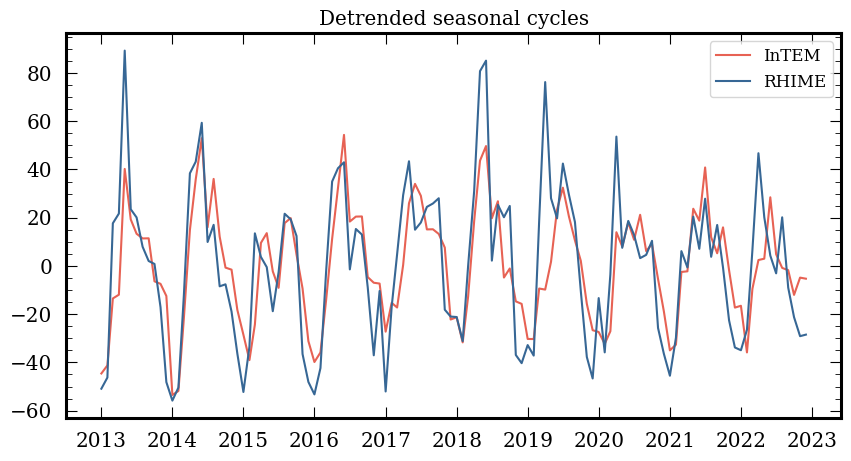

In [23]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(intem_mnthly['time'].values[12::], intem_mnthly['uk-posterior-mu-land'].values[12::] - intem_trend, '-', color=color_palette['6'], label='InTEM')
ax.plot(rhime_mnthly['time'].values, rhime_mnthly['uk-posterior-mean-land'].values/1e9 - rhime_trend, '-', color=color_palette['4'], label='RHIME')
# ax.plot(bmcmc_local_262['time'].values, bmcmc_local_262['uk-posterior-mu-land'].values/1e9 - bmcmc_262_trend, '-', color=color_palette['main1'], label='Bristol-MCMC (262)')
ax.legend()
ax.set_title("Detrended seasonal cycles")
plt.show()

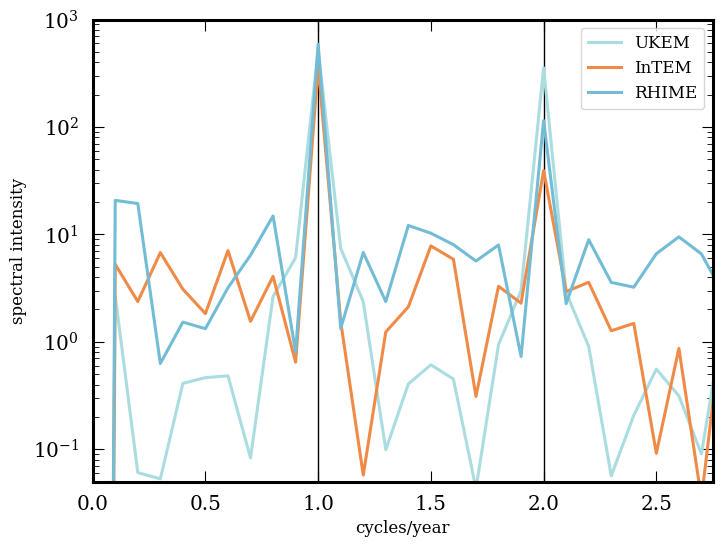

In [26]:
# Calculate and plot the seasonal power spectral density 
signal_intem = intem_mnthly['uk-posterior-mu-land'].values[12::] - intem_trend
signal_bmcmc = rhime_mnthly['uk-posterior-mean-land'].values/1e9 - rhime_trend
signal_ukghg = rhime_mnthly['uk-prior-land'].values/1e9

fs = 1 # freq of 1 data/month 

# (f, S) = scipy.signal.welch(signal, fs, nperseg=224)
(f_intem, S_intem) = scipy.signal.periodogram(signal_intem, fs, scaling='spectrum')
(f_bmcmc, S_bmcmc) = scipy.signal.periodogram(signal_bmcmc, fs, scaling='spectrum')
(f_ukghg, S_ukghg) = scipy.signal.periodogram(signal_ukghg, fs, scaling='spectrum')


fig, ax = plt.subplots(figsize=(8,6))
ax.semilogy(f_ukghg * 12, S_ukghg, '-',color=color_palette['5'], lw=2.2, label='UKEM')
ax.semilogy(f_intem * 12, S_intem, '-',color=color_palette['2'], lw=2.2, label='InTEM')
ax.semilogy(f_bmcmc * 12, S_bmcmc, '-',color=color_palette['1'], lw=2.2, label='RHIME')

ax.axvline(x=1, color='k', lw=1.0, zorder=0)
ax.axvline(x=2, color='k', lw=1.0, zorder=0)
ax.set_xlabel("cycles/year")
ax.set_ylabel("spectral intensity")
ax.set_xlim((0, 2.75))
ax.set_ylim((50e-3, 10e2))
ax.legend()
plt.show()

In [27]:
def harmonic_1(x, A, B, C, F):
    return A * np.sin(B*x+F)+C

# Fit single harmonic to emissions
intem_detrended = intem_mnthly['uk-posterior-mu-land'].values[12::] - intem_trend
rhime_detrended = rhime_mnthly['uk-posterior-mean-land'].values/1e9 - rhime_trend
# bmcmc262_detrended = bmcmc_local_262['uk-posterior-mu-land'].values/1e9 - bmcmc_262_trend

xdata = np.linspace(0, 2*np.pi*10, 120)
# xdata = np.linspace(0, 121, 120)
ydata = intem_detrended

popt_intem, pcov_intem = scipy.optimize.curve_fit(harmonic_1, xdata, intem_detrended)
popt_bmcmc, pcov_bmcmc = scipy.optimize.curve_fit(harmonic_1, xdata, rhime_detrended)

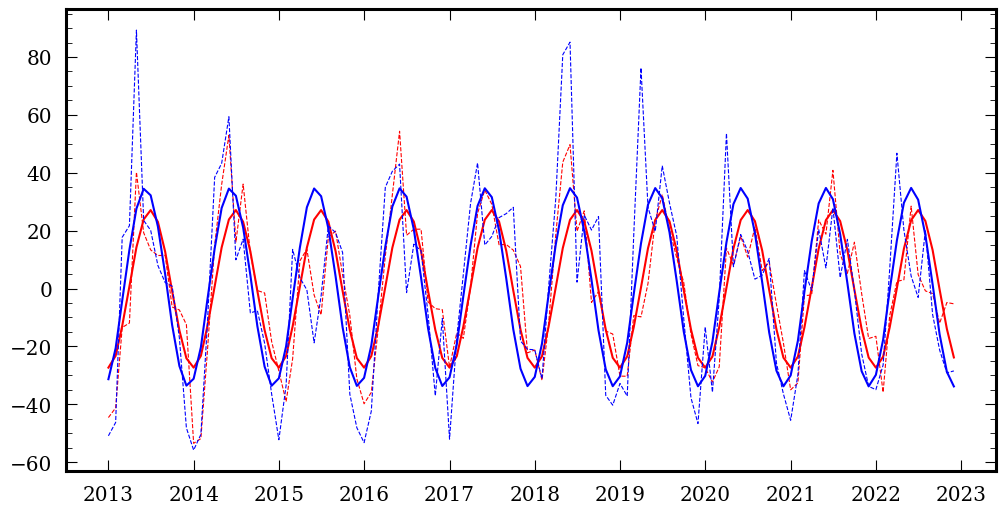

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(intem_mnthly['time'].values[12::], intem_detrended, 'r--', label='InTEM', lw=0.8)
ax.plot(intem_mnthly['time'].values[12::], harmonic_1(xdata, popt_intem[0], popt_intem[1], popt_intem[2], popt_intem[3]), 'r-')

ax.plot(rhime_mnthly['time'], rhime_detrended, 'b--', label='BMCMC-193', lw=0.8)
ax.plot(intem_mnthly['time'].values[12::], harmonic_1(xdata, popt_bmcmc[0], popt_bmcmc[1], popt_bmcmc[2], popt_bmcmc[3]), 'b-')

# ax.plot(bmcmc_local_262['time'], bmcmc262_detrended, 'g-', label='BMCMC-262', lw=0.5)

plt.show()

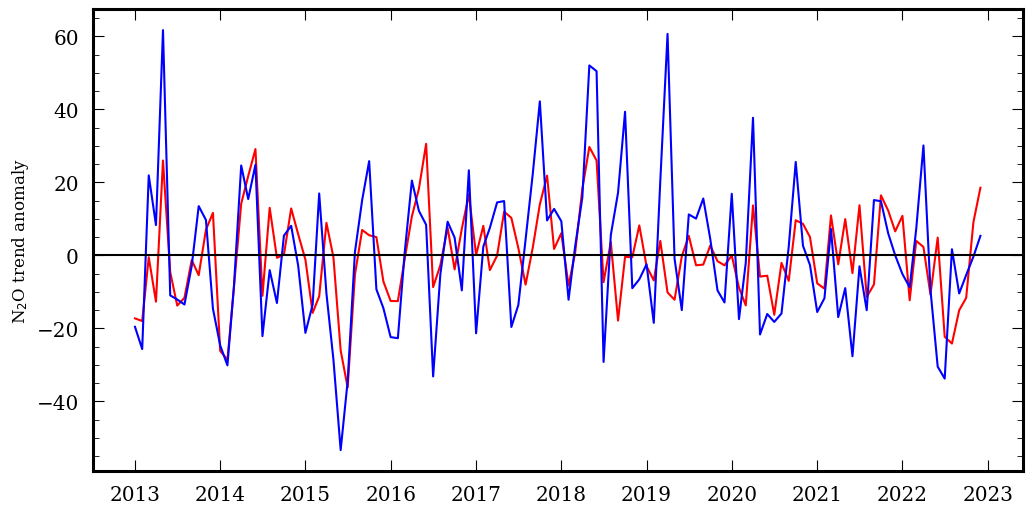

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(intem_mnthly['time'].values[12::], intem_detrended - harmonic_1(xdata, popt_intem[0], popt_intem[1], popt_intem[2], popt_intem[3]), 'r-')
ax.plot(rhime_mnthly['time'].values, rhime_detrended - harmonic_1(xdata, popt_bmcmc[0], popt_bmcmc[1], popt_bmcmc[2], popt_bmcmc[3]), 'b-')
ax.axhline(0, color='k')
ax.set_ylabel(r"N$_{2}$O trend anomaly")
plt.show()

In [32]:
# FIT SINGLE ANNUAL HARMONIC 
xdata = np.linspace(0, 1*np.pi, 12)

# INTEM
popt_intem_2013, pcov_intem_2013 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[0:12])
popt_intem_2014, pcov_intem_2014 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[12:24])
popt_intem_2015, pcov_intem_2015 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[24:36])
popt_intem_2016, pcov_intem_2016 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[36:48])
popt_intem_2017, pcov_intem_2017 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[48:60])
popt_intem_2018, pcov_intem_2018 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[60:72])
popt_intem_2019, pcov_intem_2019 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[72:84])
popt_intem_2020, pcov_intem_2020 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[84:96])
popt_intem_2021, pcov_intem_2021 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[96:108])
popt_intem_2022, pcov_intem_2022 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[108::])

# BMCMC
# popt_bmcmc_2013, pcov_bmcmc_2013 = scipy.optimize.curve_fit(harmonic_1, xdata[:], bmcmc193_detrended[0:12])
# popt_bmcmc_2014, pcov_bmcmc_2014 = scipy.optimize.curve_fit(harmonic_1, xdata[:], bmcmc193_detrended[12:24])
popt_bmcmc_2015, pcov_bmcmc_2015 = scipy.optimize.curve_fit(harmonic_1, xdata[:], rhime_detrended[24:36])
# popt_bmcmc_2016, pcov_bmcmc_2016 = scipy.optimize.curve_fit(harmonic_1, xdata[:], bmcmc193_detrended[36:48])
# popt_bmcmc_2017, pcov_bmcmc_2017 = scipy.optimize.curve_fit(harmonic_1, np.linspace(0, 1*np.pi, 14), bmcmc193_detrended[48:62])
# popt_bmcmc_2018, pcov_bmcmc_2018 = scipy.optimize.curve_fit(harmonic_1, xdata[:], bmcmc193_detrended[60:72])
# popt_bmcmc_2019, pcov_bmcmc_2019 = scipy.optimize.curve_fit(harmonic_1, xdata[:], bmcmc193_detrended[72:84])
# popt_bmcmc_2020, pcov_bmcmc_2020 = scipy.optimize.curve_fit(harmonic_1, xdata[:], bmcmc193_detrended[84:96])
# popt_bmcmc_2021, pcov_bmcmc_2021 = scipy.optimize.curve_fit(harmonic_1, np.linspace(0, 1*np.pi, 14), bmcmc193_detrended[96:110])
popt_bmcmc_2022, pcov_bmcmc_2022 = scipy.optimize.curve_fit(harmonic_1, xdata[:], rhime_detrended[108::])


xdata = np.linspace(0, 1*np.pi, 14)

# INTEM
popt_intem_2013, pcov_intem_2013 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[0:14])
popt_intem_2014, pcov_intem_2014 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[11:25])
popt_intem_2015, pcov_intem_2015 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[23:37])
popt_intem_2016, pcov_intem_2016 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[36:50])
popt_intem_2017, pcov_intem_2017 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[47:61])
popt_intem_2018, pcov_intem_2018 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[59:73])
popt_intem_2019, pcov_intem_2019 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[71:85])
popt_intem_2020, pcov_intem_2020 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[83:97])
popt_intem_2021, pcov_intem_2021 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[95:109])
# popt_intem_2022, pcov_intem_2022 = scipy.optimize.curve_fit(harmonic_1, xdata[:], intem_detrended[106::])


# RHIME
popt_bmcmc_2013, pcov_bmcmc_2013 = scipy.optimize.curve_fit(harmonic_1, xdata[:], rhime_detrended[0:14])
popt_bmcmc_2014, pcov_bmcmc_2014 = scipy.optimize.curve_fit(harmonic_1, xdata[:], rhime_detrended[11:25])
# popt_bmcmc_2015, pcov_bmcmc_2015 = scipy.optimize.curve_fit(harmonic_1, xdata[:], bmcmc193_detrended[23:37])
popt_bmcmc_2016, pcov_bmcmc_2016 = scipy.optimize.curve_fit(harmonic_1, xdata[:], rhime_detrended[36:50])
popt_bmcmc_2017, pcov_bmcmc_2017 = scipy.optimize.curve_fit(harmonic_1, xdata[:], rhime_detrended[47:61])
popt_bmcmc_2018, pcov_bmcmc_2018 = scipy.optimize.curve_fit(harmonic_1, xdata[:], rhime_detrended[59:73])
popt_bmcmc_2019, pcov_bmcmc_2019 = scipy.optimize.curve_fit(harmonic_1, xdata[:], rhime_detrended[71:85])
popt_bmcmc_2020, pcov_bmcmc_2020 = scipy.optimize.curve_fit(harmonic_1, xdata[:], rhime_detrended[83:97])
popt_bmcmc_2021, pcov_bmcmc_2021 = scipy.optimize.curve_fit(harmonic_1, xdata[:], rhime_detrended[95:109])
# popt_bmcmc_2022, pcov_bmcmc_2022 = scipy.optimize.curve_fit(harmonic_1, xdata[:], bmcmc193_detrended[106::])


In [33]:
# RHIME amplitude and cov
bmcmc_amp = [np.abs(popt_bmcmc_2013[0]), 
             np.abs(popt_bmcmc_2014[0]),
             np.abs(popt_bmcmc_2015[0]),
             np.abs(popt_bmcmc_2016[0]),
             np.abs(popt_bmcmc_2017[0]),
             np.abs(popt_bmcmc_2018[0]),
             np.abs(popt_bmcmc_2019[0]),
             np.abs(popt_bmcmc_2020[0]),
             np.abs(popt_bmcmc_2021[0]),
             np.abs(popt_bmcmc_2022[0])
            ]

bmcmc_amp_err = [np.sqrt(np.diag(pcov_bmcmc_2013))[0],
                 np.sqrt(np.diag(pcov_bmcmc_2014))[0],
                 np.sqrt(np.diag(pcov_bmcmc_2015))[0],
                 np.sqrt(np.diag(pcov_bmcmc_2016))[0],
                 np.sqrt(np.diag(pcov_bmcmc_2017))[0],
                 np.sqrt(np.diag(pcov_bmcmc_2018))[0],
                 np.sqrt(np.diag(pcov_bmcmc_2019))[0],
                 np.sqrt(np.diag(pcov_bmcmc_2020))[0],
                 np.sqrt(np.diag(pcov_bmcmc_2021))[0],
                 np.sqrt(np.diag(pcov_bmcmc_2022))[0]
                ]

# InTEM amplitude and cov
intem_amp = [np.abs(popt_intem_2013[0]),
             np.abs(popt_intem_2014[0]),
             np.abs(popt_intem_2015[0]),
             np.abs(popt_intem_2016[0]),
             np.abs(popt_intem_2017[0]),
             np.abs(popt_intem_2018[0]),
             np.abs(popt_intem_2019[0]),
             np.abs(popt_intem_2020[0]),
             np.abs(popt_intem_2021[0]),
             np.abs(popt_intem_2022[0])
            ]

intem_amp_err = [np.sqrt(np.diag(pcov_intem_2013))[0],
                 np.sqrt(np.diag(pcov_intem_2014))[0],
                 np.sqrt(np.diag(pcov_intem_2015))[0],
                 np.sqrt(np.diag(pcov_intem_2016))[0],
                 np.sqrt(np.diag(pcov_intem_2017))[0],
                 np.sqrt(np.diag(pcov_intem_2018))[0],
                 np.sqrt(np.diag(pcov_intem_2019))[0],
                 np.sqrt(np.diag(pcov_intem_2020))[0],
                 np.sqrt(np.diag(pcov_intem_2021))[0],
                 np.sqrt(np.diag(pcov_intem_2022))[0]
                ]

In [34]:
from scipy.interpolate import splev, splrep

xxx = np.arange(2013, 2023, 1)
yy1 = intem_amp
yya = bmcmc_amp

spl_intem = splrep(xxx, yy1)
spl_bmcmc = splrep(xxx, yya)

xx2 = np.linspace(2013, 2022, 200)
yy2 = splev(xx2, spl_intem)
yyb = splev(xx2, spl_bmcmc)

# plt.plot(x, y, 'o', x2, y2)
# plt.show()

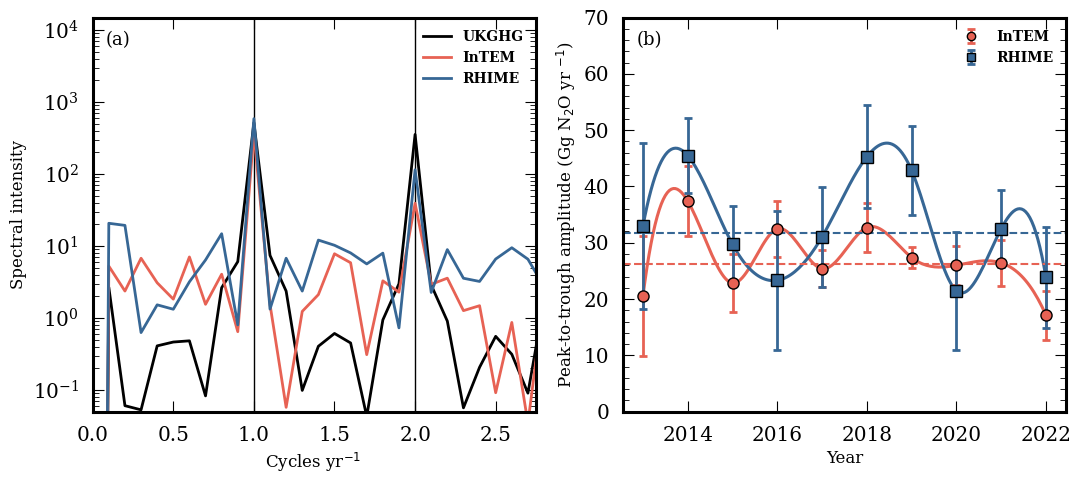

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(11,5))
ax[0].semilogy(f_ukghg * 12, S_ukghg, '-',color='k', lw=2.0, label='UKGHG')
ax[0].semilogy(f_intem * 12, S_intem, '-',color=color_palette['6'], lw=2., label='InTEM')
ax[0].semilogy(f_bmcmc * 12, S_bmcmc, '-',color=color_palette['4'], lw=2., label='RHIME')

ax[0].axvline(x=1, color='k', lw=1.0, zorder=0)
ax[0].axvline(x=2, color='k', lw=1.0, zorder=0)
ax[0].set_xlabel(r"Cycles yr$^{-1}$ ")
ax[0].set_ylabel("Spectral intensity")
ax[0].set_xlim((0, 2.75))
ax[0].set_ylim((50e-3, 15e3))
ax[0].legend(loc=1, ncol=1, fancybox=False, frameon=False, prop={'weight':'bold', 'size':'small'})
ax[0].text(0.03, 0.93,'(a)', transform=ax[0].transAxes, fontsize=13)


ax[1].errorbar(np.arange(2013, 2023, 1), intem_amp, yerr=intem_amp_err, fmt='o', color=color_palette['6'], lw=2., 
               ms=8, capthick=2, capsize=3, label='InTEM', markeredgecolor='k')

ax[1].plot(xx2, yy2, '-', color=color_palette['6'], lw=2.2, zorder=0)

ax[1].errorbar(np.arange(2013, 2023, 1), bmcmc_amp, yerr=bmcmc_amp_err, fmt='s', color=color_palette['4'], lw=2., 
               ms=8, capthick=2, capsize=3, label='RHIME', markeredgecolor='k')


ax[1].plot(xx2, yyb, '-', color=color_palette['4'], lw=2.2, zorder=0)


# ax1 = ax[1].twinx()
# ax1.plot(np.arange(2013, 2023, 1), [1322,1521,1723,1381,1331,1321,1393,1735,1219,1321], 'k-')


ax[1].set_ylabel("Peak-to-trough amplitude (Gg N$_{2}$O yr $^{-1}$)")
ax[1].set_xlabel(r"Year")
ax[1].set_ylim((0, 70))
ax[1].legend(markerscale=0.75, loc=1, fancybox=False, frameon=False, prop={'weight':'bold', 'size':'small'})
ax[1].text(0.03, 0.93,'(b)', transform=ax[1].transAxes, fontsize=13)

ax[1].axhline(np.median(intem_amp), color=color_palette['6'], ls='--', zorder=0)
ax[1].axhline(np.median(bmcmc_amp), color=color_palette['4'], ls='--', zorder=0)

fig.tight_layout()
# plt.show()
plt.savefig("../fig_paper/seasonal_ft_amp.jpg", dpi=300)

In [45]:
# Annual average rainfall data
# https://www.statista.com/statistics/610664/annual-rainfall-uk/
rain_yr = [1322,1521,1723,1381,1331,1321,1393,1735,1219,1321]


# Monthly total at time of big peak [2014 - 2022]
# https://www.statista.com/statistics/584914/monthly-rainfall-in-uk/
rain_mnth_peak = [67.5, 56.2, 96.1, 33.2, 83.9, 109.0, 30.0, 82.3, 49.8]

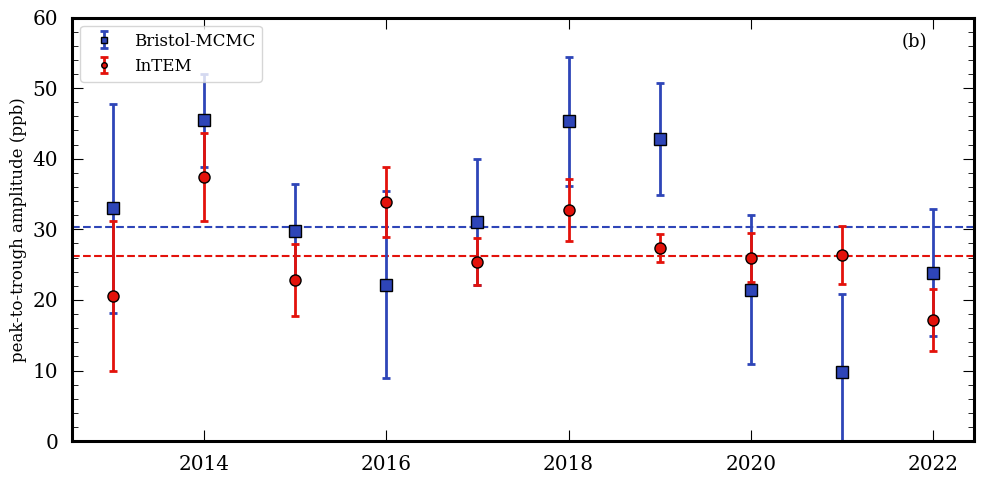

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.errorbar(np.arange(2013, 2023, 1), bmcmc_amp, yerr=bmcmc_amp_err, fmt='s', color=color_palette['main1'], lw=2., 
               ms=8, capthick=2, capsize=3, label='Bristol-MCMC', markeredgecolor='k')

ax.errorbar(np.arange(2013, 2023, 1), intem_amp, yerr=intem_amp_err, fmt='o', color=color_palette['main2'], lw=2., 
               ms=8, capthick=2, capsize=3, label='InTEM', markeredgecolor='k')

ax.set_ylabel("peak-to-trough amplitude (ppb)")
ax.set_ylim((0, 60))
ax.legend(markerscale=0.5, loc=2)
ax.text(0.92, 0.93,'(b)', transform=ax.transAxes, fontsize=13)

ax.axhline(np.median(intem_amp), color=color_palette['main2'], ls='--', zorder=0)
ax.axhline(np.median(bmcmc_amp), color=color_palette['main1'], ls='--', zorder=0)

# ax2 = ax.twinx()
# ax2.plot(np.arange(2013, 2023, 1), rain_yr, 'k^--', ms=10)
# ax2.plot(np.arange(2014, 2023, 1), rain_mnth_peak, 'ks--')

# ax2.set_ylabel("Annual average UK precipitation (mm)")

fig.tight_layout()
plt.show()

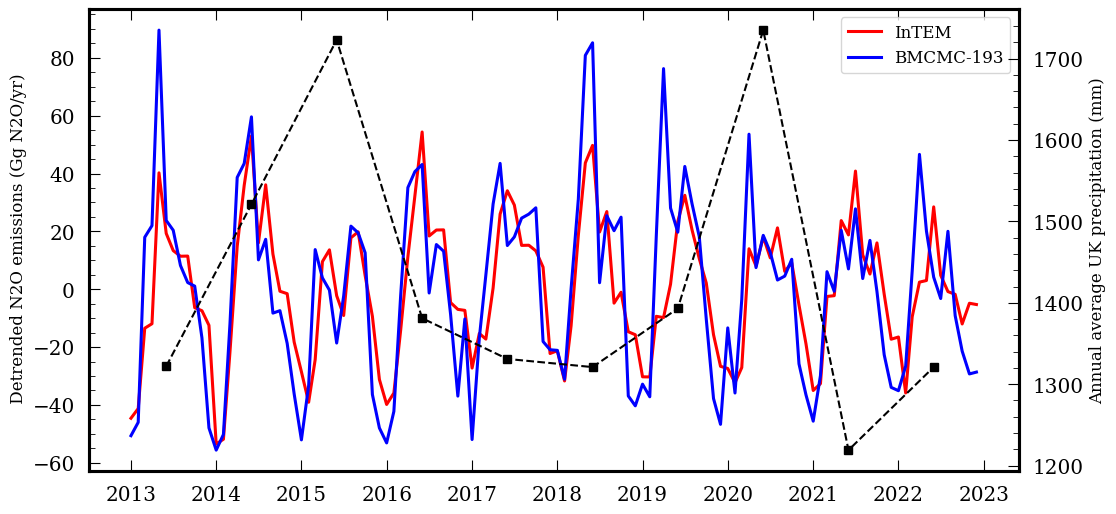

In [75]:
time_yr_arr = [dt.datetime(2013, 6, 1), 
               dt.datetime(2014, 6, 1), 
               dt.datetime(2015, 6, 1), 
               dt.datetime(2016, 6, 1), 
               dt.datetime(2017, 6, 1), 
               dt.datetime(2018, 6, 1), 
               dt.datetime(2019, 6, 1), 
               dt.datetime(2020, 6, 1), 
               dt.datetime(2021, 6, 1), 
               dt.datetime(2022, 6, 1)              
              ]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(intem['time'].values[12::], intem_detrended, 'r-', label='InTEM', lw=2.2)
ax.plot(bmcmc_local_193['time'], bmcmc193_detrended, 'b-', label='BMCMC-193', lw=2.2)
ax.set_ylabel(" Detrended N2O emissions (Gg N2O/yr)")


ax2 = ax.twinx()
ax2.plot(time_yr_arr, rain_yr, 'ks--')
ax2.set_ylabel("Annual average UK precipitation (mm)")

ax.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (12,) and (14,)

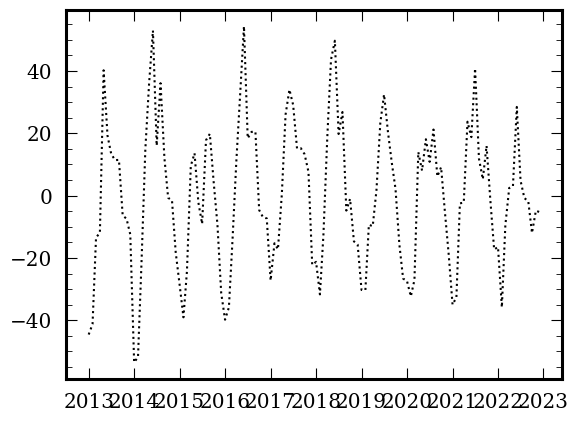

In [26]:
fig, ax = plt.subplots()
ax.plot(intem['time'].values[12::], intem_detrended[:], 'k:')

ax.plot(intem['time'].values[12:24], harmonic_1(xdata, popt_intem_2013[0], popt_intem_2013[1], popt_intem_2013[2], popt_intem_2013[3]), 'r-')
ax.plot(intem['time'].values[24:36], harmonic_1(xdata, popt_intem_2014[0], popt_intem_2014[1], popt_intem_2014[2], popt_intem_2014[3]), 'b-')
ax.plot(intem['time'].values[36:48], harmonic_1(xdata, popt_intem_2015[0], popt_intem_2015[1], popt_intem_2015[2], popt_intem_2015[3]), 'r-')
ax.plot(intem['time'].values[48:60], harmonic_1(xdata, popt_intem_2016[0], popt_intem_2016[1], popt_intem_2016[2], popt_intem_2016[3]), 'b-')

ax.plot(intem['time'].values[60:72], harmonic_1(xdata, popt_intem_2017[0], popt_intem_2017[1], popt_intem_2017[2], popt_intem_2017[3]), 'r-')
ax.plot(intem['time'].values[72:84], harmonic_1(xdata, popt_intem_2018[0], popt_intem_2018[1], popt_intem_2018[2], popt_intem_2018[3]), 'b-')

ax.plot(intem['time'].values[84:96], harmonic_1(xdata, popt_intem_2019[0], popt_intem_2019[1], popt_intem_2019[2], popt_intem_2019[3]), 'r-')
ax.plot(intem['time'].values[96:108], harmonic_1(xdata, popt_intem_2020[0], popt_intem_2020[1], popt_intem_2020[2], popt_intem_2020[3]), 'b-')

ax.plot(intem['time'].values[108:120], harmonic_1(xdata, popt_intem_2021[0], popt_intem_2021[1], popt_intem_2021[2], popt_intem_2021[3]), 'r-')
ax.plot(intem['time'].values[120::], harmonic_1(xdata, popt_intem_2022[0], popt_intem_2022[1], popt_intem_2022[2], popt_intem_2022[3]), 'b-')

# ax.set_xlim((intem['time'].values[108], intem['time'].values[-1] ))

plt.show()

In [37]:
intem_yr_2013 = harmonic_1(xdata, popt_intem_2013[0], popt_intem_2013[1], popt_intem_2013[2], popt_intem_2013[3])
intem_yr_2014 = harmonic_1(xdata, popt_intem_2014[0], popt_intem_2014[1], popt_intem_2014[2], popt_intem_2014[3])
intem_yr_2015 = harmonic_1(xdata, popt_intem_2015[0], popt_intem_2015[1], popt_intem_2015[2], popt_intem_2015[3])
intem_yr_2016 = harmonic_1(xdata, popt_intem_2016[0], popt_intem_2016[1], popt_intem_2016[2], popt_intem_2016[3])
intem_yr_2017 = harmonic_1(xdata, popt_intem_2017[0], popt_intem_2017[1], popt_intem_2017[2], popt_intem_2017[3])
intem_yr_2018 = harmonic_1(xdata, popt_intem_2018[0], popt_intem_2018[1], popt_intem_2018[2], popt_intem_2018[3])
intem_yr_2019 = harmonic_1(xdata, popt_intem_2019[0], popt_intem_2019[1], popt_intem_2019[2], popt_intem_2019[3])
intem_yr_2020 = harmonic_1(xdata, popt_intem_2020[0], popt_intem_2020[1], popt_intem_2020[2], popt_intem_2020[3])
intem_yr_2021 = harmonic_1(xdata, popt_intem_2021[0], popt_intem_2021[1], popt_intem_2021[2], popt_intem_2021[3])
intem_yr_2022 = harmonic_1(xdata, popt_intem_2022[0], popt_intem_2022[1], popt_intem_2022[2], popt_intem_2022[3])

In [28]:
print("Amplitude")
print("2013",np.max(intem_yr_2013) - np.min(intem_yr_2013))
print("2014",np.max(intem_yr_2014) - np.min(intem_yr_2014))
print("2015",np.max(intem_yr_2015) - np.min(intem_yr_2015))
print("2016",np.max(intem_yr_2016) - np.min(intem_yr_2016))
print("2017",np.max(intem_yr_2017) - np.min(intem_yr_2017))
print("2018",np.max(intem_yr_2018) - np.min(intem_yr_2018))
print("2019",np.max(intem_yr_2019) - np.min(intem_yr_2019))
print("2020",np.max(intem_yr_2020) - np.min(intem_yr_2020))
print("2021",np.max(intem_yr_2021) - np.min(intem_yr_2021))
print("2022",np.max(intem_yr_2022) - np.min(intem_yr_2022))

Amplitude
2013 40.81802768222616
2014 74.58838190144863
2015 45.170851361303946
2016 67.16300834924371
2017 50.58038183960038
2018 64.78676388948764
2019 54.393164991241434
2020 51.11563162712846
2021 52.226299212664095
2022 34.26207832012879


In [29]:
# PHASE
print("2013", np.where(intem_yr_2013==np.max(intem_yr_2013)) )
print("2014", np.where(intem_yr_2014==np.max(intem_yr_2014)) )
print("2015", np.where(intem_yr_2015==np.max(intem_yr_2015)) )
print("2016", np.where(intem_yr_2016==np.max(intem_yr_2016)) )
print("2017", np.where(intem_yr_2017==np.max(intem_yr_2017)) )
print("2018", np.where(intem_yr_2018==np.max(intem_yr_2018)) )
print("2019", np.where(intem_yr_2019==np.max(intem_yr_2019)) )
print("2020", np.where(intem_yr_2020==np.max(intem_yr_2020)) )
print("2021", np.where(intem_yr_2021==np.max(intem_yr_2021)) )
print("2022", np.where(intem_yr_2022==np.max(intem_yr_2022)) )

2013 (array([4]),)
2014 (array([7]),)
2015 (array([7]),)
2016 (array([7]),)
2017 (array([7]),)
2018 (array([6]),)
2019 (array([7]),)
2020 (array([7]),)
2021 (array([7]),)
2022 (array([6]),)


In [30]:
bmcmc_yr_2013 = harmonic_1(xdata, popt_bmcmc_2013[0], popt_bmcmc_2013[1], popt_bmcmc_2013[2], popt_bmcmc_2013[3])
bmcmc_yr_2014 = harmonic_1(xdata, popt_bmcmc_2014[0], popt_bmcmc_2014[1], popt_bmcmc_2014[2], popt_bmcmc_2014[3])
bmcmc_yr_2015 = harmonic_1(xdata, popt_bmcmc_2015[0], popt_bmcmc_2015[1], popt_bmcmc_2015[2], popt_bmcmc_2015[3])
bmcmc_yr_2016 = harmonic_1(xdata, popt_bmcmc_2016[0], popt_bmcmc_2016[1], popt_bmcmc_2016[2], popt_bmcmc_2016[3])
bmcmc_yr_2017 = harmonic_1(xdata, popt_bmcmc_2017[0], popt_bmcmc_2017[1], popt_bmcmc_2017[2], popt_bmcmc_2017[3])
bmcmc_yr_2018 = harmonic_1(xdata, popt_bmcmc_2018[0], popt_bmcmc_2018[1], popt_bmcmc_2018[2], popt_bmcmc_2018[3])
bmcmc_yr_2019 = harmonic_1(xdata, popt_bmcmc_2019[0], popt_bmcmc_2019[1], popt_bmcmc_2019[2], popt_bmcmc_2019[3])
bmcmc_yr_2020 = harmonic_1(xdata, popt_bmcmc_2020[0], popt_bmcmc_2020[1], popt_bmcmc_2020[2], popt_bmcmc_2020[3])
bmcmc_yr_2021 = harmonic_1(xdata, popt_bmcmc_2021[0], popt_bmcmc_2021[1], popt_bmcmc_2021[2], popt_bmcmc_2021[3])
bmcmc_yr_2022 = harmonic_1(xdata, popt_bmcmc_2022[0], popt_bmcmc_2022[1], popt_bmcmc_2022[2], popt_bmcmc_2022[3])

In [31]:
print("Amplitude")
print("2013",np.max(bmcmc_yr_2013) - np.min(bmcmc_yr_2013))
print("2014",np.max(bmcmc_yr_2014) - np.min(bmcmc_yr_2014))
print("2015",np.max(bmcmc_yr_2015) - np.min(bmcmc_yr_2015))
print("2016",np.max(bmcmc_yr_2016) - np.min(bmcmc_yr_2016))
print("2017",np.max(bmcmc_yr_2017) - np.min(bmcmc_yr_2017))
print("2018",np.max(bmcmc_yr_2018) - np.min(bmcmc_yr_2018))
print("2019",np.max(bmcmc_yr_2019) - np.min(bmcmc_yr_2019))
print("2020",np.max(bmcmc_yr_2020) - np.min(bmcmc_yr_2020))
print("2021",np.max(bmcmc_yr_2021) - np.min(bmcmc_yr_2021))
print("2022",np.max(bmcmc_yr_2022) - np.min(bmcmc_yr_2022))

Amplitude
2013 64.96425032257042
2014 90.63468782305486
2015 58.72956775997522
2016 44.189151799524744
2017 61.352836116288145
2018 90.39339436071938
2019 85.42692643276406
2020 42.73819646845121
2021 19.26035316006397
2022 47.44799012364123


In [32]:
# PHASE
print("2013", np.where(bmcmc_yr_2013==np.max(bmcmc_yr_2013)) )
print("2014", np.where(bmcmc_yr_2014==np.max(bmcmc_yr_2014)) )
print("2015", np.where(bmcmc_yr_2015==np.max(bmcmc_yr_2015)) )
print("2016", np.where(bmcmc_yr_2016==np.max(bmcmc_yr_2016)) )
print("2017", np.where(bmcmc_yr_2017==np.max(bmcmc_yr_2017)) )
print("2018", np.where(bmcmc_yr_2018==np.max(bmcmc_yr_2018)) )
print("2019", np.where(bmcmc_yr_2019==np.max(bmcmc_yr_2019)) )
print("2020", np.where(bmcmc_yr_2020==np.max(bmcmc_yr_2020)) )
print("2021", np.where(bmcmc_yr_2021==np.max(bmcmc_yr_2021)) )
print("2022", np.where(bmcmc_yr_2022==np.max(bmcmc_yr_2022)) )

2013 (array([9]),)
2014 (array([6]),)
2015 (array([3]),)
2016 (array([4]),)
2017 (array([7]),)
2018 (array([6]),)
2019 (array([6]),)
2020 (array([4]),)
2021 (array([6]),)
2022 (array([9]),)


In [33]:
# Calculate the amplitude and phase of each seasonal peak 
N = len(intem_detrended)
y = intem_detrended
x = np.arange(0, N, 1)

tck = interpolate.splrep(x, y, s=3)
# xnew = np.arange(0, np.pi, np.pi/50)
xnew = np.arange(1, N, 2.5)
ynew = interpolate.splev(xnew, tck, der=0)


plt.plot(x, y, 'o-')
plt.plot(xnew[43::], ynew[43::], '-')
plt.xlim((80, 132))
plt.ylim((-60, 60))
plt.show()

NameError: name 'interpolate' is not defined

In [34]:
print("InTEM")
print("========")
print("2013")
print("Amplitude", np.max(ynew[0:6])-np.min(ynew[0:6]))
print("Phase", xnew[np.where(ynew[0:6]==np.max(ynew[0:6]))][0])
print("========")
print("2014")
print("Amplitude", np.max(ynew[5:10])-np.min(ynew[5:10]))
print("Phase", xnew[np.where(ynew[5:10]==np.max(ynew[5:10]))][0])
print("========")
print("2015")
print("Amplitude", np.max(ynew[10:15])-np.min(ynew[10:15]))
print("Phase", xnew[np.where(ynew[10:15]==np.max(ynew[10:15]))][0])
print("========")
print("2016")
print("Amplitude", np.max(ynew[14:20])-np.min(ynew[14:20]))
print("Phase", xnew[np.where(ynew[14:20]==np.max(ynew[14:20]))][0])
print("========")
print("2017")
print("Amplitude", np.max(ynew[19:25])-np.min(ynew[19:25]))
print("Phase", xnew[np.where(ynew[19:25]==np.max(ynew[19:25]))][0])
print("========")
print("2018")
print("Amplitude", np.max(ynew[24:30])-np.min(ynew[24:30]))
print("Phase", xnew[np.where(ynew[24:30]==np.max(ynew[24:30]))][0])
print("========")
print("2019")
print("Amplitude", np.max(ynew[29:35])-np.min(ynew[29:35]))
print("Phase", xnew[np.where(ynew[29:35]==np.max(ynew[29:35]))][0])
print("========")
print("2020")
print("Amplitude", np.max(ynew[34:39])-np.min(ynew[34:39]))
print("Phase", xnew[np.where(ynew[34:39]==np.max(ynew[34:39]))][0])
print("========")
print("2021")
print("Amplitude", np.max(ynew[38:44])-np.min(ynew[38:44]))
print("Phase", xnew[np.where(ynew[38:44]==np.max(ynew[38:44]))][0])
print("========")
print("2022")
print("Amplitude", np.max(ynew[43::])-np.min(ynew[43::]))
print("Phase", xnew[np.where(ynew[43::]==np.max(ynew[43::]))][0])

InTEM
2013


NameError: name 'ynew' is not defined

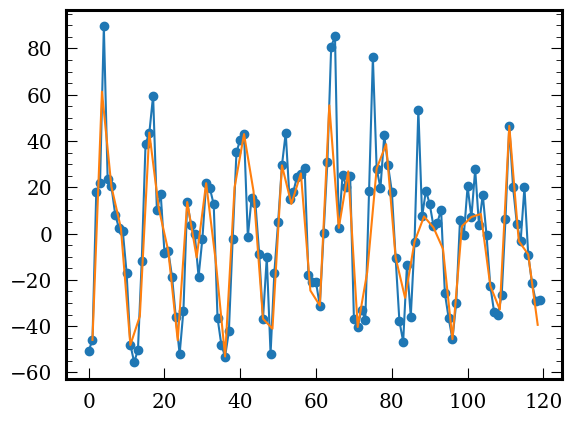

In [200]:
N = len(bmcmc193_detrended)
y = bmcmc193_detrended
x = np.arange(0, N, 1)

tck = interpolate.splrep(x, y, s=3)
# xnew = np.arange(0, np.pi, np.pi/50)
xnew = np.arange(1, N, 2.5)
ynew = interpolate.splev(xnew, tck, der=0)

plt.plot(x, y, 'o-')
plt.plot(xnew, ynew, '-')
# plt.xlim((80, 132))
# plt.ylim((-60, 60))
plt.show()

In [201]:
print("BMCMC")
print("========")
print("2013")
print("Amplitude", np.max(ynew[0:6])-np.min(ynew[0:6]))
print("Phase", xnew[np.where(ynew[0:6]==np.max(ynew[0:6]))][0])
print("========")
print("2014")
print("Amplitude", np.max(ynew[5:10])-np.min(ynew[5:10]))
print("Phase", xnew[np.where(ynew[5:10]==np.max(ynew[5:10]))][0])
print("========")
print("2015")
print("Amplitude", np.max(ynew[10:15])-np.min(ynew[10:15]))
print("Phase", xnew[np.where(ynew[10:15]==np.max(ynew[10:15]))][0])
print("========")
print("2016")
print("Amplitude", np.max(ynew[14:20])-np.min(ynew[14:20]))
print("Phase", xnew[np.where(ynew[14:20]==np.max(ynew[14:20]))][0])
print("========")
print("2017")
print("Amplitude", np.max(ynew[19:25])-np.min(ynew[19:25]))
print("Phase", xnew[np.where(ynew[19:25]==np.max(ynew[19:25]))][0])
print("========")
print("2018")
print("Amplitude", np.max(ynew[24:30])-np.min(ynew[24:30]))
print("Phase", xnew[np.where(ynew[24:30]==np.max(ynew[24:30]))][0])
print("========")
print("2019")
print("Amplitude", np.max(ynew[29:35])-np.min(ynew[29:35]))
print("Phase", xnew[np.where(ynew[29:35]==np.max(ynew[29:35]))][0])
print("========")
print("2020")
print("Amplitude", np.max(ynew[34:39])-np.min(ynew[34:39]))
print("Phase", xnew[np.where(ynew[34:39]==np.max(ynew[34:39]))][0])
print("========")
print("2021")
print("Amplitude", np.max(ynew[38:44])-np.min(ynew[38:44]))
print("Phase", xnew[np.where(ynew[38:44]==np.max(ynew[38:44]))][0])
print("========")
print("2022")
print("Amplitude", np.max(ynew[43::])-np.min(ynew[43::]))
print("Phase", xnew[np.where(ynew[43::]==np.max(ynew[43::]))][0])

BMCMC
2013
Amplitude 109.45940844319591
Phase 3.5
2014
Amplitude 89.74258964902612
Phase 3.5
2015
Amplitude 74.87102264505673
Phase 6.0
2016
Amplitude 96.0988607146709
Phase 6.0
2017
Amplitude 70.57142672565641
Phase 3.5
2018
Amplitude 95.76389892954171
Phase 3.5
2019
Amplitude 66.37083961001561
Phase 6.0
2020
Amplitude 53.025037643382376
Phase 3.5
2021
Amplitude 54.096430119754004
Phase 8.5
2022
Amplitude 85.95640432525505
Phase 3.5


### Calculate and plot monthly seasonal average

In [38]:
# bmcmc193_detrended_2 = bmcmc_local_193['uk-posterior-mu-land'].values/1e9 - bmcmc_193_trend + (bmcmc_local_193['uk-posterior-mu-land'].values[0]/1e9)
# bmcmc193_detrended_errupper_2 = bmcmc_local_193['uk-posterior-68upper-land'].values/1e9 - bmcmc_193_trend + (bmcmc_local_193['uk-posterior-mu-land'].values[0]/1e9)
# bmcmc193_detrended_errlower_2 = bmcmc_local_193['uk-posterior-68lower-land'].values/1e9 - bmcmc_193_trend + (bmcmc_local_193['uk-posterior-mu-land'].values[0]/1e9)

bmcmc193_detrended_2 = rhime_mnthly['uk-posterior-mean-land'].values/1e9 #- bmcmc_193_trend + (bmcmc_local_193['uk-posterior-mu-land'].values[0]/1e9)
bmcmc193_detrended_errupper_2 = rhime_mnthly['uk-posterior-68-land'].values[:,0]/1e9 #- bmcmc_193_trend + (bmcmc_local_193['uk-posterior-mu-land'].values[0]/1e9)
bmcmc193_detrended_errlower_2 = rhime_mnthly['uk-posterior-68-land'].values[:,1]/1e9 #- bmcmc_193_trend + (bmcmc_local_193['uk-posterior-mu-land'].values[0]/1e9)

jan_bmcmc_mu = []
feb_bmcmc_mu = []
mar_bmcmc_mu = []
apr_bmcmc_mu = []
may_bmcmc_mu = []
jun_bmcmc_mu = []
jul_bmcmc_mu = []
aug_bmcmc_mu = []
sep_bmcmc_mu = []
oct_bmcmc_mu = []
nov_bmcmc_mu = []
dec_bmcmc_mu = []

jan_bmcmc_68_upp, jan_bmcmc_68_low = [], []
feb_bmcmc_68_upp, feb_bmcmc_68_low = [], []
mar_bmcmc_68_upp, mar_bmcmc_68_low = [], []
apr_bmcmc_68_upp, apr_bmcmc_68_low = [], []
may_bmcmc_68_upp, may_bmcmc_68_low = [], []
jun_bmcmc_68_upp, jun_bmcmc_68_low = [], []
jul_bmcmc_68_upp, jul_bmcmc_68_low = [], []
aug_bmcmc_68_upp, aug_bmcmc_68_low = [], []
sep_bmcmc_68_upp, sep_bmcmc_68_low = [], []
oct_bmcmc_68_upp, oct_bmcmc_68_low = [], []
nov_bmcmc_68_upp, nov_bmcmc_68_low = [], []
dec_bmcmc_68_upp, dec_bmcmc_68_low = [], []


for i in range(0, len(bmcmc193_detrended_2), 12):
    jan_bmcmc_mu.append(bmcmc193_detrended_2[i])
    feb_bmcmc_mu.append(bmcmc193_detrended_2[i+1])
    mar_bmcmc_mu.append(bmcmc193_detrended_2[i+2])
    apr_bmcmc_mu.append(bmcmc193_detrended_2[i+3])
    may_bmcmc_mu.append(bmcmc193_detrended_2[i+4])
    jun_bmcmc_mu.append(bmcmc193_detrended_2[i+5])
    jul_bmcmc_mu.append(bmcmc193_detrended_2[i+6])
    aug_bmcmc_mu.append(bmcmc193_detrended_2[i+7])
    sep_bmcmc_mu.append(bmcmc193_detrended_2[i+8])    
    oct_bmcmc_mu.append(bmcmc193_detrended_2[i+9])
    nov_bmcmc_mu.append(bmcmc193_detrended_2[i+10])
    dec_bmcmc_mu.append(bmcmc193_detrended_2[i+11])    
    
    jan_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i])
    feb_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i+1])
    mar_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i+2])
    apr_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i+3])
    may_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i+4])
    jun_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i+5])
    jul_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i+6])
    aug_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i+7])
    sep_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i+8])    
    oct_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i+9])
    nov_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i+10])
    dec_bmcmc_68_upp.append(bmcmc193_detrended_errupper_2[i+11])    
   
    jan_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i])
    feb_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i+1])
    mar_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i+2])
    apr_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i+3])
    may_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i+4])
    jun_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i+5])
    jul_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i+6])
    aug_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i+7])
    sep_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i+8])    
    oct_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i+9])
    nov_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i+10])
    dec_bmcmc_68_low.append(bmcmc193_detrended_errlower_2[i+11])    

In [40]:
intem_detrended_2 = intem_mnthly['uk-posterior-mu-land'].values[12::] #- intem_trend + intem['uk-posterior-mu-land'].values[12]
intem_detrended_err_2 = intem_mnthly['uk-posterior-68-land'].values[12::] #- intem_trend + intem['uk-posterior-mu-land'].values[12]

jan_intem_mu = []
feb_intem_mu = []
mar_intem_mu = []
apr_intem_mu = []
may_intem_mu = []
jun_intem_mu = []
jul_intem_mu = []
aug_intem_mu = []
sep_intem_mu = []
oct_intem_mu = []
nov_intem_mu = []
dec_intem_mu = []

jan_intem_68 = []
feb_intem_68 = []
mar_intem_68 = []
apr_intem_68 = []
may_intem_68 = []
jun_intem_68 = []
jul_intem_68 = []
aug_intem_68 = []
sep_intem_68 = []
oct_intem_68 = []
nov_intem_68 = []
dec_intem_68 = []

for i in range(0, len(intem_detrended_2), 12):
    jan_intem_mu.append(intem_detrended_2[i])
    feb_intem_mu.append(intem_detrended_2[i+1])
    mar_intem_mu.append(intem_detrended_2[i+2])
    apr_intem_mu.append(intem_detrended_2[i+3])
    may_intem_mu.append(intem_detrended_2[i+4])
    jun_intem_mu.append(intem_detrended_2[i+5])
    jul_intem_mu.append(intem_detrended_2[i+6])
    aug_intem_mu.append(intem_detrended_2[i+7])
    sep_intem_mu.append(intem_detrended_2[i+8])    
    oct_intem_mu.append(intem_detrended_2[i+9])
    nov_intem_mu.append(intem_detrended_2[i+10])
    dec_intem_mu.append(intem_detrended_2[i+11])    
    
    jan_intem_68.append(intem_detrended_err_2[i])
    feb_intem_68.append(intem_detrended_err_2[i+1])
    mar_intem_68.append(intem_detrended_err_2[i+2])
    apr_intem_68.append(intem_detrended_err_2[i+3])
    may_intem_68.append(intem_detrended_err_2[i+4])
    jun_intem_68.append(intem_detrended_err_2[i+5])
    jul_intem_68.append(intem_detrended_err_2[i+6])
    aug_intem_68.append(intem_detrended_err_2[i+7])
    sep_intem_68.append(intem_detrended_err_2[i+8])    
    oct_intem_68.append(intem_detrended_err_2[i+9])
    nov_intem_68.append(intem_detrended_err_2[i+10])
    dec_intem_68.append(intem_detrended_err_2[i+11])    

In [41]:
ukghg_prior = rhime_mnthly['uk-prior-land'].values/1e9 #- bmcmc_193_trend + (bmcmc_local_193['uk-posterior-mu-land'].values[0]/1e9)

ols_ukghg_out = stats.linregress(np.arange(0, len(ukghg_prior), 1), ukghg_prior)
ukghg_trend = np.arange(0, len(ukghg_prior), 1)*ols_ukghg_out[0] + ols_ukghg_out[1]

ukghg_prior_detrend = ukghg_prior #- ukghg_trend + ukghg_prior[0]

jan_ukghg_mu = []
feb_ukghg_mu = []
mar_ukghg_mu = []
apr_ukghg_mu = []
may_ukghg_mu = []
jun_ukghg_mu = []
jul_ukghg_mu = []
aug_ukghg_mu = []
sep_ukghg_mu = []
oct_ukghg_mu = []
nov_ukghg_mu = []
dec_ukghg_mu = []

for i in range(0, len(ukghg_prior), 12):
    jan_ukghg_mu.append(ukghg_prior_detrend[i])
    feb_ukghg_mu.append(ukghg_prior_detrend[i+1])
    mar_ukghg_mu.append(ukghg_prior_detrend[i+2])
    apr_ukghg_mu.append(ukghg_prior_detrend[i+3])
    may_ukghg_mu.append(ukghg_prior_detrend[i+4])
    jun_ukghg_mu.append(ukghg_prior_detrend[i+5])
    jul_ukghg_mu.append(ukghg_prior_detrend[i+6])
    aug_ukghg_mu.append(ukghg_prior_detrend[i+7])
    sep_ukghg_mu.append(ukghg_prior_detrend[i+8])    
    oct_ukghg_mu.append(ukghg_prior_detrend[i+9])
    nov_ukghg_mu.append(ukghg_prior_detrend[i+10])
    dec_ukghg_mu.append(ukghg_prior_detrend[i+11])    

In [42]:
t_mnth = np.arange(1, 13, 1)

# BMCMC
bmcmc_mnth_median = np.array([np.median(jan_bmcmc_mu), np.median(feb_bmcmc_mu), np.median(mar_bmcmc_mu),
                              np.median(apr_bmcmc_mu), np.median(may_bmcmc_mu), np.median(jun_bmcmc_mu),
                              np.median(jul_bmcmc_mu), np.median(aug_bmcmc_mu), np.median(sep_bmcmc_mu),
                              np.median(oct_bmcmc_mu), np.median(nov_bmcmc_mu), np.median(dec_bmcmc_mu)])

bmcmc_mnth_mean = np.array([np.mean(jan_bmcmc_mu), np.mean(feb_bmcmc_mu), np.mean(mar_bmcmc_mu),
                            np.mean(apr_bmcmc_mu), np.mean(may_bmcmc_mu), np.mean(jun_bmcmc_mu),
                            np.mean(jul_bmcmc_mu), np.mean(aug_bmcmc_mu), np.mean(sep_bmcmc_mu),
                            np.mean(oct_bmcmc_mu), np.mean(nov_bmcmc_mu), np.mean(dec_bmcmc_mu)])

bmcmc_mnth_std  = np.array([np.std(jan_bmcmc_mu), np.std(feb_bmcmc_mu), np.std(mar_bmcmc_mu),
                            np.std(apr_bmcmc_mu), np.std(may_bmcmc_mu), np.std(jun_bmcmc_mu),
                            np.std(jul_bmcmc_mu), np.std(aug_bmcmc_mu), np.std(sep_bmcmc_mu),
                            np.std(oct_bmcmc_mu), np.std(nov_bmcmc_mu), np.std(dec_bmcmc_mu)])


bmcmc_mnth_mean_upper = np.array([np.mean(jan_bmcmc_68_upp), np.mean(feb_bmcmc_68_upp), np.mean(mar_bmcmc_68_upp),
                                  np.mean(apr_bmcmc_68_upp), np.mean(may_bmcmc_68_upp), np.mean(jun_bmcmc_68_upp),
                                  np.mean(jul_bmcmc_68_upp), np.mean(aug_bmcmc_68_upp), np.mean(sep_bmcmc_68_upp),
                                  np.mean(oct_bmcmc_68_upp), np.mean(nov_bmcmc_68_upp), np.mean(dec_bmcmc_68_upp)])

bmcmc_mnth_mean_lower = np.array([np.mean(jan_bmcmc_68_low), np.mean(feb_bmcmc_68_low), np.mean(mar_bmcmc_68_low),
                                  np.mean(apr_bmcmc_68_low), np.mean(may_bmcmc_68_low), np.mean(jun_bmcmc_68_low),
                                  np.mean(jul_bmcmc_68_low), np.mean(aug_bmcmc_68_low), np.mean(sep_bmcmc_68_low),
                                  np.mean(oct_bmcmc_68_low), np.mean(nov_bmcmc_68_low), np.mean(dec_bmcmc_68_low)])



# InTEM
intem_mnth_median = np.array([np.median(jan_intem_mu), np.median(feb_intem_mu), np.median(mar_intem_mu),
                              np.median(apr_intem_mu), np.median(may_intem_mu), np.median(jun_intem_mu),
                              np.median(jul_intem_mu), np.median(aug_intem_mu), np.median(sep_intem_mu),
                              np.median(oct_intem_mu), np.median(nov_intem_mu), np.median(dec_intem_mu)])

intem_mnth_mean = np.array([np.mean(jan_intem_mu), np.mean(feb_intem_mu), np.mean(mar_intem_mu),
                            np.mean(apr_intem_mu), np.mean(may_intem_mu), np.mean(jun_intem_mu),
                            np.mean(jul_intem_mu), np.mean(aug_intem_mu), np.mean(sep_intem_mu),
                            np.mean(oct_intem_mu), np.mean(nov_intem_mu), np.mean(dec_intem_mu)])

intem_mnth_mean_err = np.array([np.mean(jan_intem_68), np.mean(feb_intem_68), np.mean(mar_intem_68),
                                np.mean(apr_intem_68), np.mean(may_intem_68), np.mean(jun_intem_68),
                                np.mean(jul_intem_68), np.mean(aug_intem_68), np.mean(sep_intem_68),
                                np.mean(oct_intem_68), np.mean(nov_intem_68), np.mean(dec_intem_68)])


# UKGHG
ukghg_mnth_mean = np.array([np.mean(jan_ukghg_mu), np.mean(feb_ukghg_mu), np.mean(mar_ukghg_mu),
                            np.mean(apr_ukghg_mu), np.mean(may_ukghg_mu), np.mean(jun_ukghg_mu),
                            np.mean(jul_ukghg_mu), np.mean(aug_ukghg_mu), np.mean(sep_ukghg_mu),
                            np.mean(oct_ukghg_mu), np.mean(nov_ukghg_mu), np.mean(dec_ukghg_mu)])

ukghg_mnth_mean_std = np.array([np.std(jan_ukghg_mu), np.std(feb_ukghg_mu), np.std(mar_ukghg_mu),
                                np.std(apr_ukghg_mu), np.std(may_ukghg_mu), np.std(jun_ukghg_mu),
                                np.std(jul_ukghg_mu), np.std(aug_ukghg_mu), np.std(sep_ukghg_mu),
                                np.std(oct_ukghg_mu), np.std(nov_ukghg_mu), np.std(dec_ukghg_mu)])

In [39]:
# # Save mean seasonal profiles
# my_mnths = [1,2,3,4,5,6,7,8,9,10,11,12]

# f = open("/user/work/wz22079/projects/N2O/data/bmcmc-seasonal-profile.txt", "w+")
# f.write("month,mean,stdev\n")

# for i in range(0, 12):
#     f.write(str(my_mnths[i])+','+
#             str(bmcmc_mnth_mean[i])+','+
#             str(bmcmc_mnth_std[i])+'\n')
# f.close()


# f = open("/user/work/wz22079/projects/N2O/data/intem-seasonal-profile.txt", "w+")
# f.write("month,mean,stdev,\n")

# for i in range(0, 12):
#     f.write(str(my_mnths[i])+','+
#             str(intem_mnth_mean[i])+','+
#             str(intem_mnth_mean_err[i])+'\n'
#             )
# f.close()


# f = open("/user/work/wz22079/projects/N2O/data/ukghg-seasonal-profile.txt", "w+")
# f.write("month,mean,stdev\n")

# for i in range(0, 12):
#     f.write(str(my_mnths[i])+','+
#             str(ukghg_mnth_mean[i])+','+
#             str(ukghg_mnth_mean_std[i])+'\n'
#             )
# f.close()



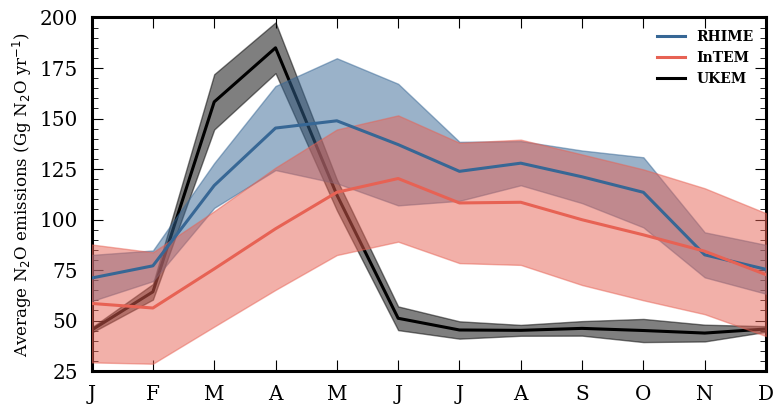

In [43]:
fig, ax = plt.subplots(figsize=(8,4.3))

# BMCMC average seasonal cycle
ax.plot(t_mnth, bmcmc_mnth_mean, '-', lw=2.2, color=color_palette['4'], label='RHIME', zorder=4)
ax.fill_between(t_mnth, bmcmc_mnth_mean-bmcmc_mnth_std, bmcmc_mnth_mean+bmcmc_mnth_std, color=color_palette['4'], alpha=0.5, zorder=3)

# InTEM average seasonal cycle
ax.plot(t_mnth, intem_mnth_mean, '-', lw=2.2, color=color_palette['6'], label='InTEM', zorder=4)
ax.fill_between(t_mnth, intem_mnth_mean-intem_mnth_mean_err, intem_mnth_mean+intem_mnth_mean_err, color=color_palette['6'], alpha=0.5, zorder=3)

# UKGHG average seasonal cycle
ax.fill_between(t_mnth, ukghg_monthly_profile['TOTAL']-ukghg_mnth_mean_std, ukghg_monthly_profile['TOTAL']+ukghg_mnth_mean_std, color='k', alpha=0.5, zorder=1)
ax.plot(t_mnth, ukghg_monthly_profile['TOTAL'], '-', lw=2.2, color='k', label='UKEM', zorder=2)



xticks = t_mnth
x_tick_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
ax.set_xticks(xticks)
ax.set_xticklabels(x_tick_labels)
ax.set_xlim((1, 12))
ax.set_ylim((25, 200))
ax.set_ylabel(r"Average N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)")

ax.legend(fancybox=False, frameon=False, prop={'weight':'bold', 'size':'small'})
fig.tight_layout()
plt.savefig("../fig_paper/seasonal_cycle_detrend.jpg", dpi=300)
# plt.show()

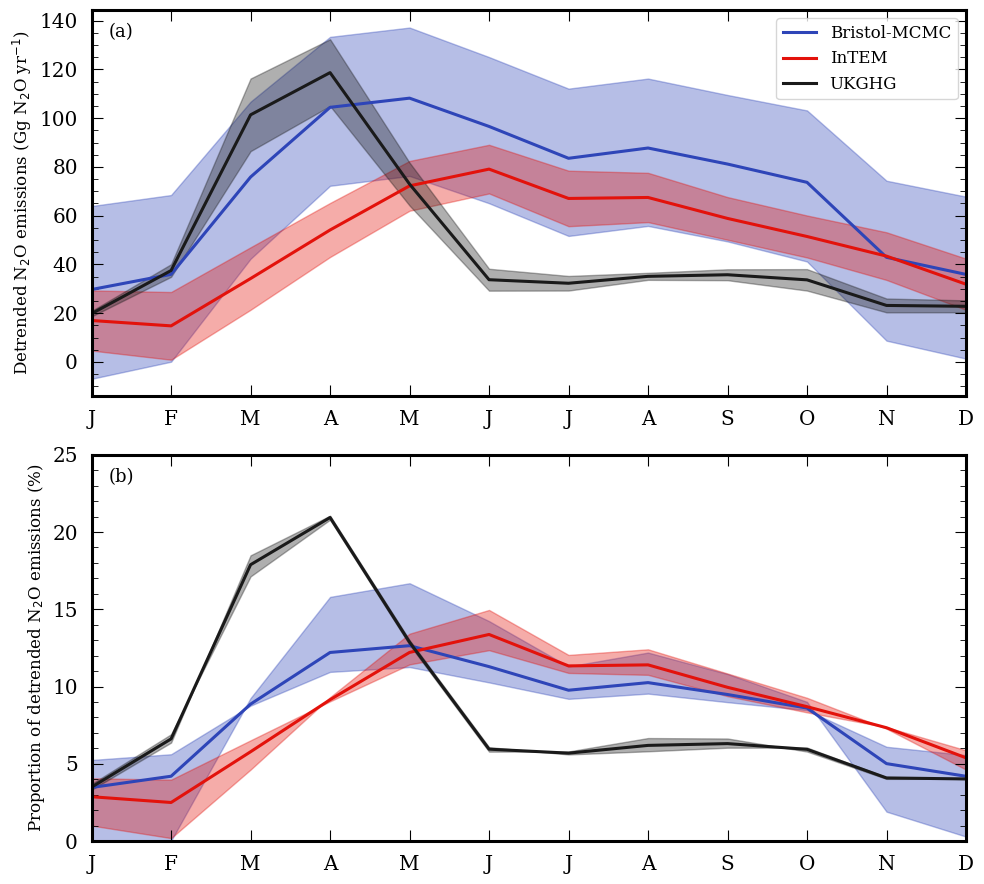

In [54]:
prop_seasonal_bmcmc = 100 * bmcmc_mnth_mean/sum(bmcmc_mnth_mean)



fig, ax = plt.subplots(2,1,figsize=(10,9))

# BMCMC average seasonal cycle
ax[0].plot(t_mnth, bmcmc_mnth_mean, '-', lw=2.2, color=color_palette['main1'], label='Bristol-MCMC')
ax[0].fill_between(t_mnth, bmcmc_mnth_mean-bmcmc_mnth_mean_lower, bmcmc_mnth_mean+bmcmc_mnth_mean_upper, color=color_palette['main1'], alpha=0.35)

# InTEM average seasonal cycle
ax[0].plot(t_mnth, intem_mnth_mean, '-', lw=2.2, color=color_palette['main2'], label='InTEM')
ax[0].fill_between(t_mnth, intem_mnth_mean-intem_mnth_mean_err, intem_mnth_mean+intem_mnth_mean_err, color=color_palette['main2'], alpha=0.35)

# UKGHG average seasonal cycle
ax[0].plot(t_mnth, ukghg_mnth_mean, '-', lw=2.2, color=color_palette['main5'], label='UKGHG')
ax[0].fill_between(t_mnth, ukghg_mnth_mean-ukghg_mnth_mean_std, ukghg_mnth_mean+ukghg_mnth_mean_std, color=color_palette['main5'], alpha=0.35)


xticks = t_mnth
x_tick_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(x_tick_labels)
ax[0].set_xlim((1, 12))
ax[0].set_ylabel(r"Detrended N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)")



# BMCMC average seasonal cycle
ax[1].plot(t_mnth, prop_seasonal_bmcmc, '-', lw=2.2, color=color_palette['main1'], label='Bristol-MCMC')
ax[1].fill_between(t_mnth, 
                100 * (bmcmc_mnth_mean-bmcmc_mnth_mean_lower)/sum(bmcmc_mnth_mean-bmcmc_mnth_mean_lower), 
                100 * (bmcmc_mnth_mean+bmcmc_mnth_mean_upper)/sum(bmcmc_mnth_mean+bmcmc_mnth_mean_upper), 
                color=color_palette['main1'], 
                alpha=0.35)

# InTEM average seasonal cycle
ax[1].plot(t_mnth, 100 * intem_mnth_mean/sum(intem_mnth_mean), '-', lw=2.2, color=color_palette['main2'], label='InTEM')
ax[1].fill_between(t_mnth, 
                100 * (intem_mnth_mean-intem_mnth_mean_err)/sum(intem_mnth_mean-intem_mnth_mean_err), 
                100 * (intem_mnth_mean+intem_mnth_mean_err)/sum(intem_mnth_mean+intem_mnth_mean_err), 
                color=color_palette['main2'], 
                alpha=0.35)

# UKGHG average seasonal cycle
ax[1].plot(t_mnth, 100 * ukghg_mnth_mean/sum(ukghg_mnth_mean), '-', lw=2.2, color=color_palette['main5'], label='UKGHG')
ax[1].fill_between(t_mnth, 
                100 * (ukghg_mnth_mean-ukghg_mnth_mean_std)/sum(ukghg_mnth_mean-ukghg_mnth_mean_std), 
                100 * (ukghg_mnth_mean+ukghg_mnth_mean_std)/sum(ukghg_mnth_mean+ukghg_mnth_mean_std), 
                color=color_palette['main5'], 
                alpha=0.35)


xticks = t_mnth
x_tick_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(x_tick_labels)
ax[1].set_xlim((1, 12))
ax[0].legend()
ax[1].set_ylim((0, 25))
ax[1].set_ylabel(r"Proportion of detrended N$_{2}$O emissions (%)")


ax[0].text(0.02, 0.93,'(a)', transform=ax[0].transAxes, fontsize=13)
ax[1].text(0.02, 0.93,'(b)', transform=ax[1].transAxes, fontsize=13)
fig.tight_layout()
plt.show()